<a href="https://colab.research.google.com/github/sobiya1234/Python/blob/main/Marketing_Campaign_Performance_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Load the dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csvfile='https://raw.githubusercontent.com/sobiya1234/Data_Set/refs/heads/main/marketing_campaign.csv'
df=pd.read_csv(csvfile)

In [ ]:
#Print the first few rows of the dataset to get an overview of the data.
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [ ]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [ ]:
#Obtaining the number of rows and columns"""
rows , columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 22029
Number of columns: 16


In [ ]:
#Geting a concise summary of the dataset, including the data types and non-null values."""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
#Generating descriptive statistics for numerical columns."""
des_stats = df.describe()
print(des_stats)

        Campaign_ID  Conversion_Rate  Acquisition_Cost           ROI  \
count  22029.000000     22029.000000      22029.000000  22029.000000   
mean   11015.000000         4.757232       5522.740842    182.863648   
std     6359.368876         0.960393       2597.666260    301.619721   
min        1.000000         2.015723       1000.000000    -98.300000   
25%     5508.000000         4.130705       3286.000000     -4.080000   
50%    11015.000000         4.761527       5525.000000     93.650000   
75%    16522.000000         5.429335       7766.000000    247.310000   
max    22029.000000         7.469907       9999.000000   3109.790000   

             Clicks   Impressions  Engagement_Score  
count  22029.000000  22029.000000      22029.000000  
mean    2223.807572  50610.402787          6.582323  
std     1394.166380  28542.979123          1.458804  
min       30.000000   1001.000000          4.000000  
25%     1067.000000  25804.000000          5.000000  
50%     2088.000000  50858.

Data Exploration:

In [ ]:
#Printing the number of unique Campaign_ID values
Unique_Campaign_ID = df['Campaign_ID'].nunique()
print(f"Number of unique Campaign_ID values: {Unique_Campaign_ID}")


Number of unique Campaign_ID values: 22029


In [ ]:
#Listing the unique values of the Location and Customer_Segment columns
unique_locations = df['Location'].unique()
unique_customer_segments = df['Customer_Segment'].unique()
print("Unique Locations:")
print(unique_locations)
print("\nUnique Customer Segments:")
print(unique_customer_segments)

Unique Locations:
['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']

Unique Customer Segments:
['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [ ]:
#Counting the occurrences of each category in the Campaign_Type and Channel_Used and columns."""
Campaign_Type_counts = df['Campaign_Type'].value_counts()
Channel_Used_counts = df['Channel_Used'].value_counts()
print("Campaign Type Counts:")
print(Campaign_Type_counts)
print("\nChannel Used Counts:")
print(Channel_Used_counts)

Campaign Type Counts:
Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

Channel Used Counts:
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


3) Exploratory Data Analysis (EDA) and Visualization
Campaign Performance:

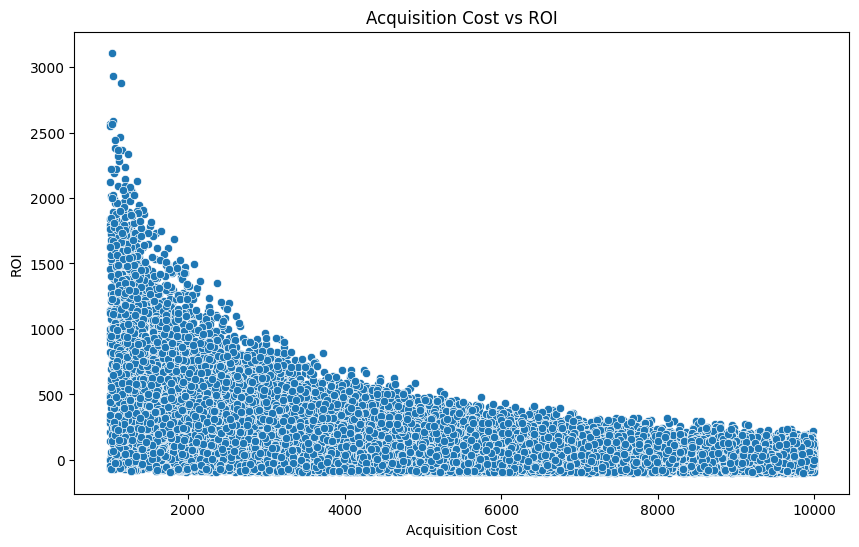

In [ ]:
#Ploting a scatter plot to visualize the relationship between Acquisition_Cost and ROI.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI')
plt.title('Acquisition Cost vs ROI')
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.show()

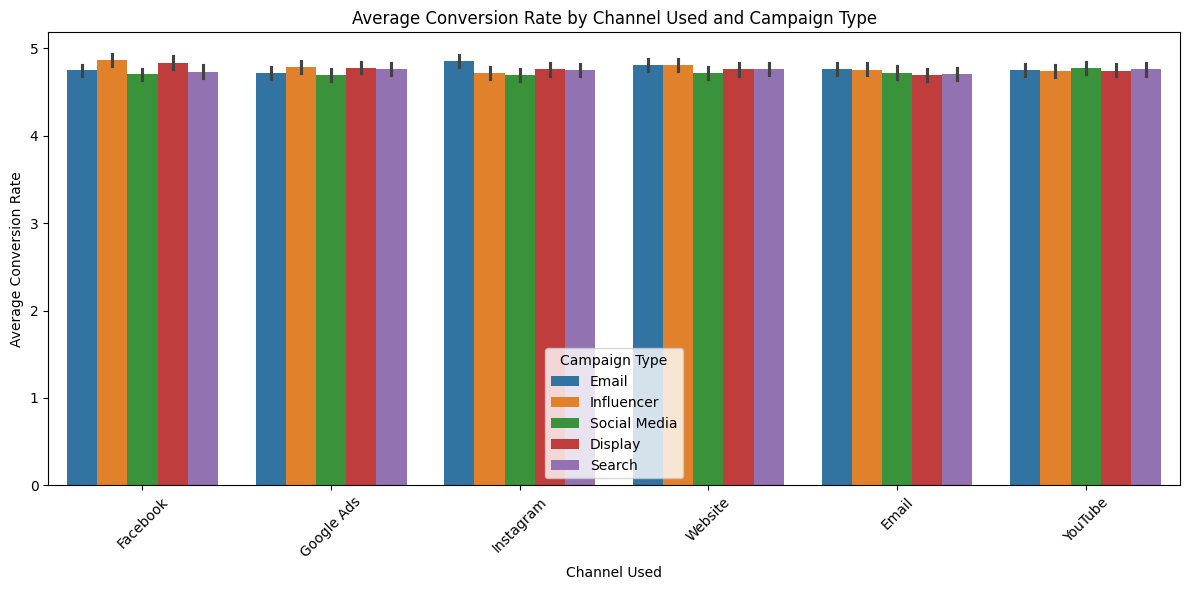

In [ ]:
#Creating a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df)
plt.title('Average Conversion Rate by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.tight_layout()
plt.show()

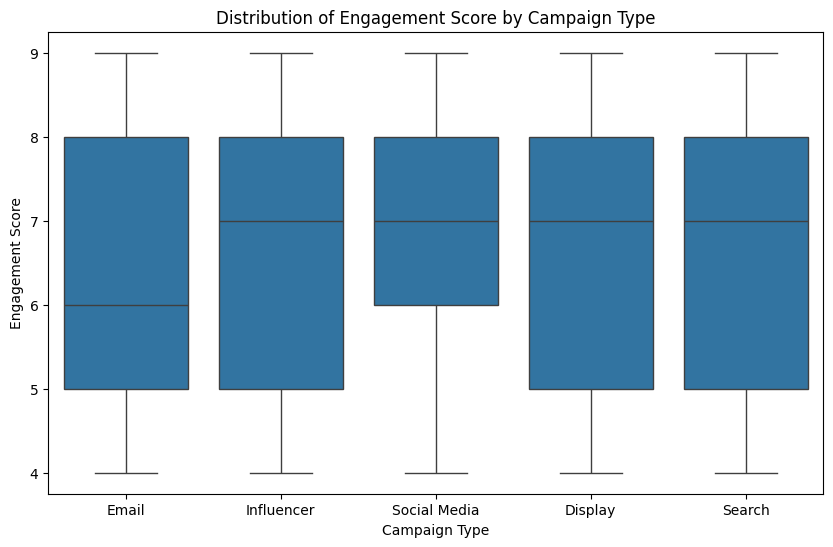

In [ ]:
#Visualizing the distribution of Engagement_Score across different Campaign_Type using a box plot."""
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df)
plt.title('Distribution of Engagement Score by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.show()

<ipython-input-22-0e028587d9b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_roi_by_company, x='Company', y='ROI', palette='Set2')


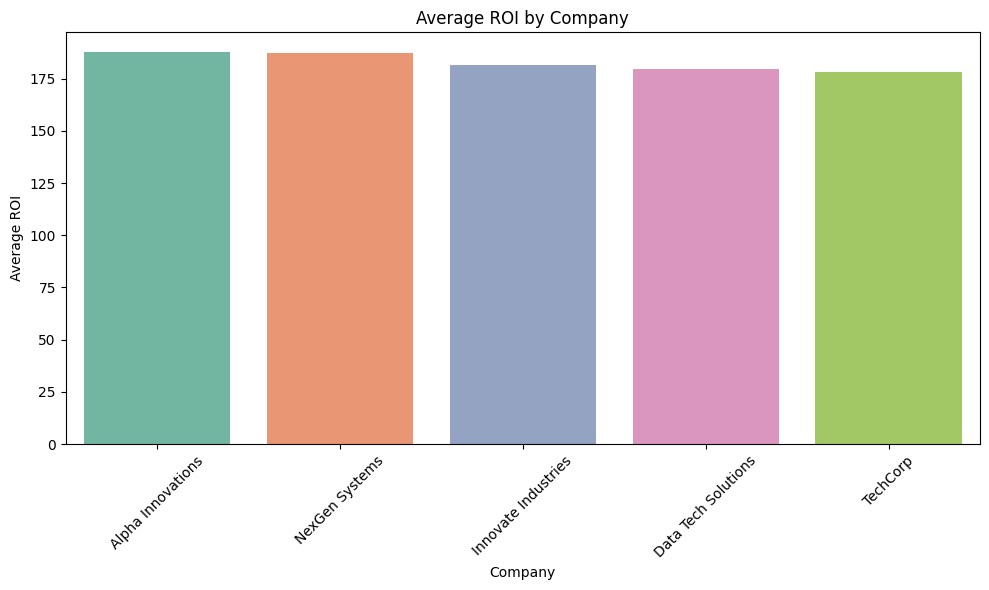

In [ ]:
#Analyzing the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies."""
plt.figure(figsize=(10, 6))
avg_roi_by_company = df.groupby('Company')['ROI'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_roi_by_company, x='Company', y='ROI', palette='Set2')
plt.title('Average ROI by Company')
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


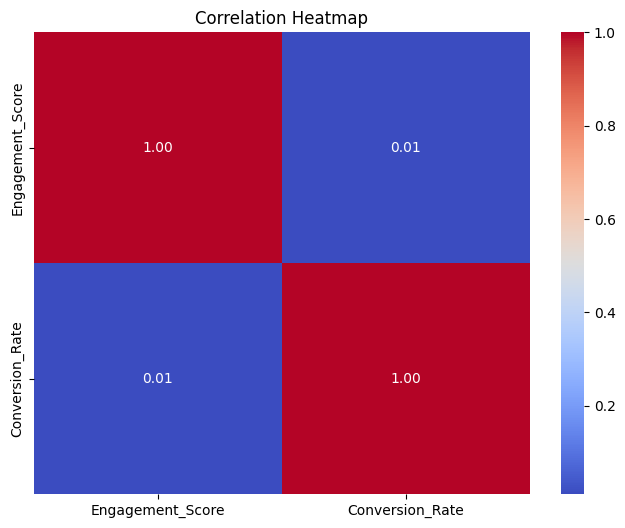

In [ ]:
#Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap."""
corr_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Customer Segmentation:

<ipython-input-23-ff1fa48009ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target_Audience', palette='Set2')


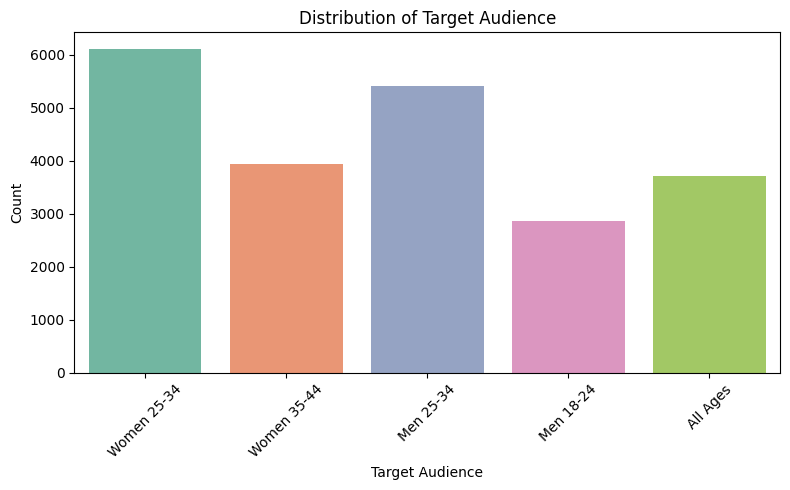

In [ ]:
#Createacount plot to visualize the distribution of Target_Audience.
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Target_Audience', palette='Set2')
plt.title('Distribution of Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.tight_layout()
plt.show()

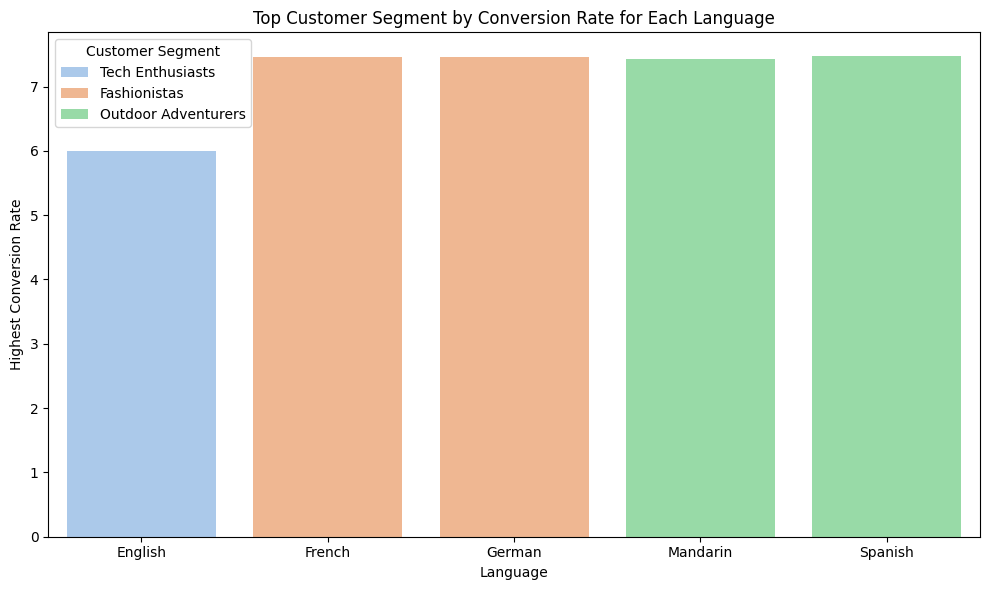

In [ ]:
#Identify which Customer_Segment has the highest Conversion_Rate for each Languageusing a bar chart.
top_segments = df.loc[df.groupby('Language')['Conversion_Rate'].idxmax()].reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_segments, x='Language', y='Conversion_Rate', hue='Customer_Segment', palette='pastel')
plt.title('Top Customer Segment by Conversion Rate for Each Language')
plt.xlabel('Language')
plt.ylabel('Highest Conversion Rate')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

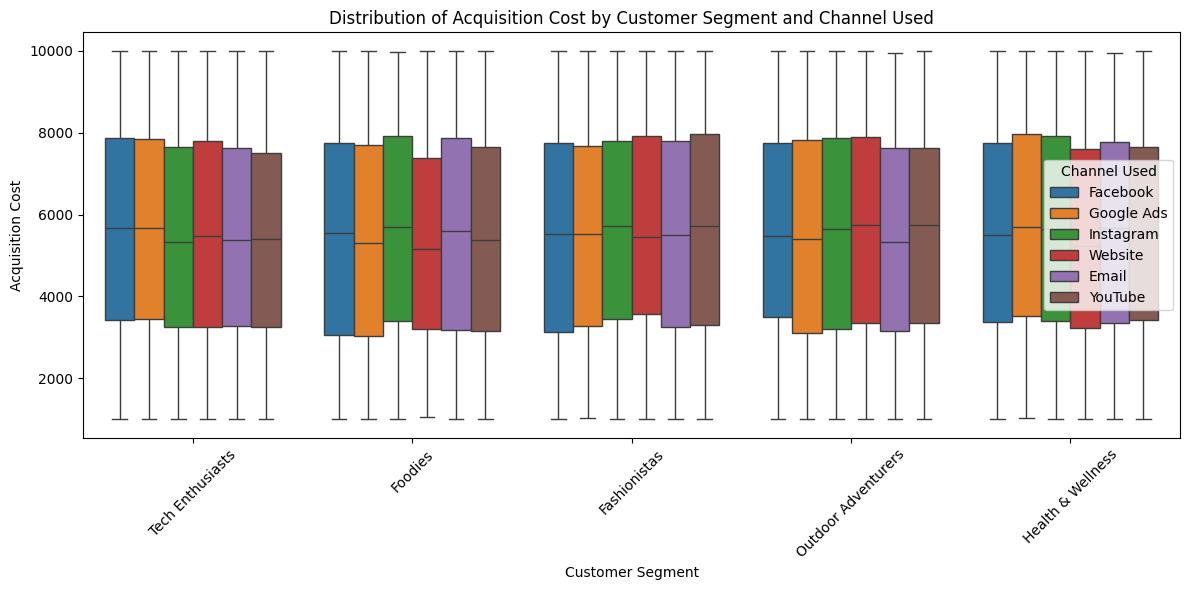

In [ ]:
#Visualizing the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=df)
plt.title('Distribution of Acquisition Cost by Customer Segment and Channel Used')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.xticks(rotation=45)
plt.legend(title='Channel Used')
plt.tight_layout()
plt.show()

<ipython-input-68-29e4817805e6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_conversion, x='Language', y='Conversion_Rate', palette='Blues')


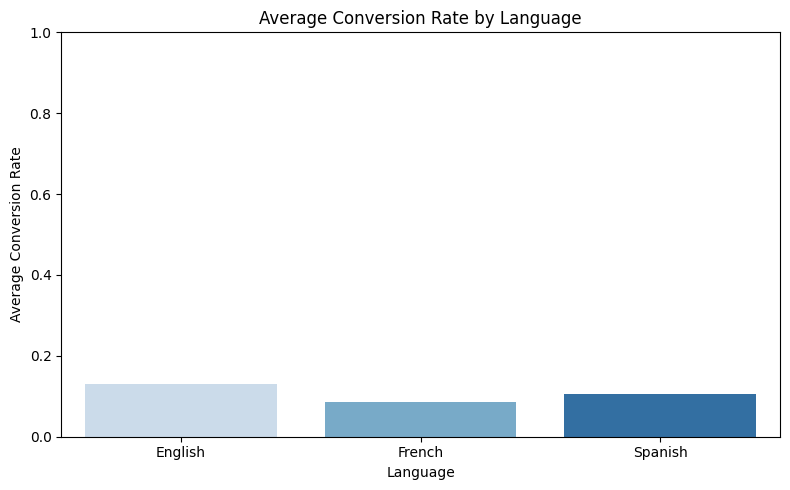

In [ ]:
#Analyzing average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages."""
data = {
    'Language': ['English', 'Spanish', 'French', 'English', 'Spanish', 'French'],
    'Conversion_Rate': [0.12, 0.10, 0.09, 0.14, 0.11, 0.08]
}
df = pd.DataFrame(data)

# Calculate average Conversion Rate by Language
avg_conversion = df.groupby('Language')['Conversion_Rate'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_conversion, x='Language', y='Conversion_Rate', palette='Blues')

plt.title('Average Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.ylim(0, 1)  # Assuming conversion rate is between 0 and 1
plt.tight_layout()
plt.show()

Channel Effectiveness:

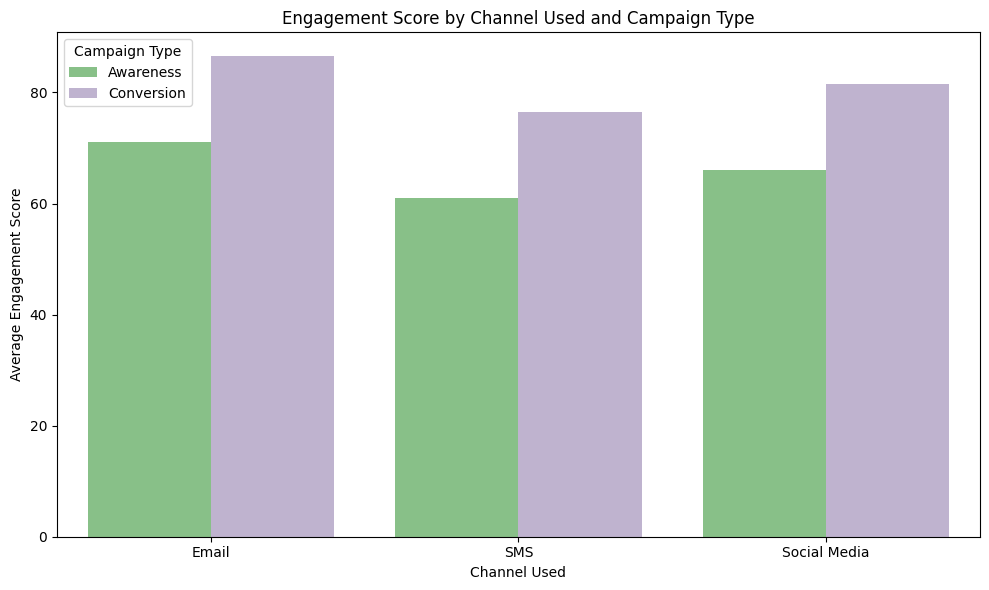

In [ ]:
#Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.
data = {
    'Channels_Used': ['Email', 'Email', 'Social Media', 'Social Media', 'SMS', 'SMS'] * 2,
    'Campaign_Type': ['Awareness', 'Conversion'] * 6,
    'Engagement_Score': [70, 85, 65, 80, 60, 75, 72, 88, 67, 83, 62, 78]
}
df = pd.DataFrame(data)

# Calculate average Engagement Score for each combination
avg_engagement = df.groupby(['Channels_Used', 'Campaign_Type'])['Engagement_Score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_engagement, x='Channels_Used', y='Engagement_Score', hue='Campaign_Type', palette='Accent')

plt.title('Engagement Score by Channel Used and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Engagement Score')
plt.legend(title='Campaign Type')
plt.tight_layout()
plt.show()

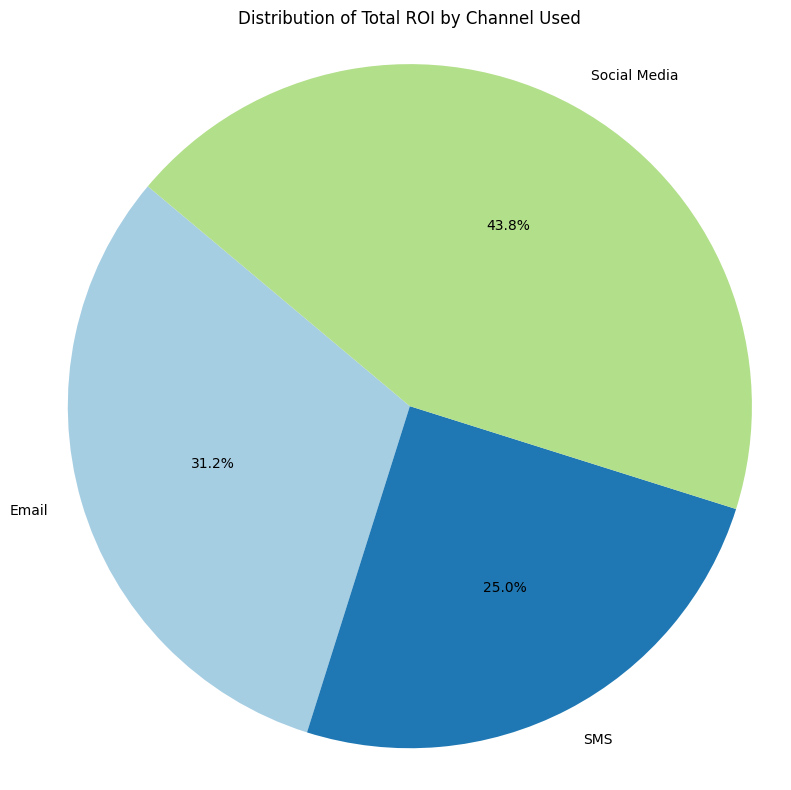

In [ ]:
#Show the distribution of total ROI across different Channels_Used using a pie chart.
data = {
    'Channels_Used': ['Email', 'Social Media', 'SMS', 'Email', 'Social Media', 'SMS'],
    'ROI': [1200, 1800, 900, 1300, 1700, 1100]
}
df = pd.DataFrame(data)

# Calculate total ROI per channel
roi_by_channel = df.groupby('Channels_Used')['ROI'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Total ROI by Channel Used')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()

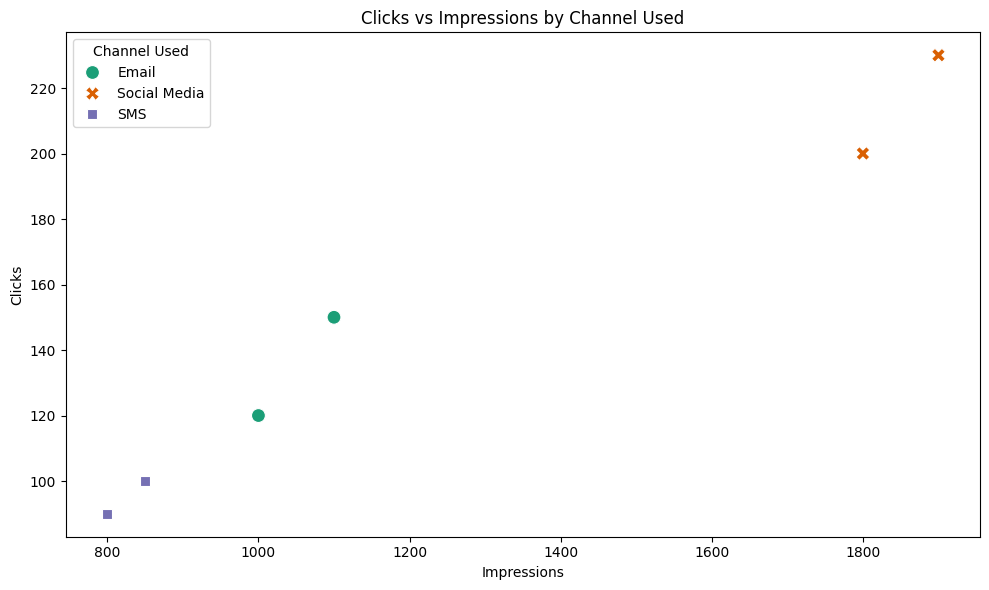

In [ ]:
#Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used.
data = {
    'Channel_Used': ['Email', 'Email', 'Social Media', 'Social Media', 'SMS', 'SMS'],
    'Clicks': [120, 150, 200, 230, 90, 100],
    'Impressions': [1000, 1100, 1800, 1900, 800, 850]
}
df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Channel_Used', style='Channel_Used', s=100, palette='Dark2')

plt.title('Clicks vs Impressions by Channel Used')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend(title='Channel Used')
plt.tight_layout()
plt.show()

Time-Based Analysis:

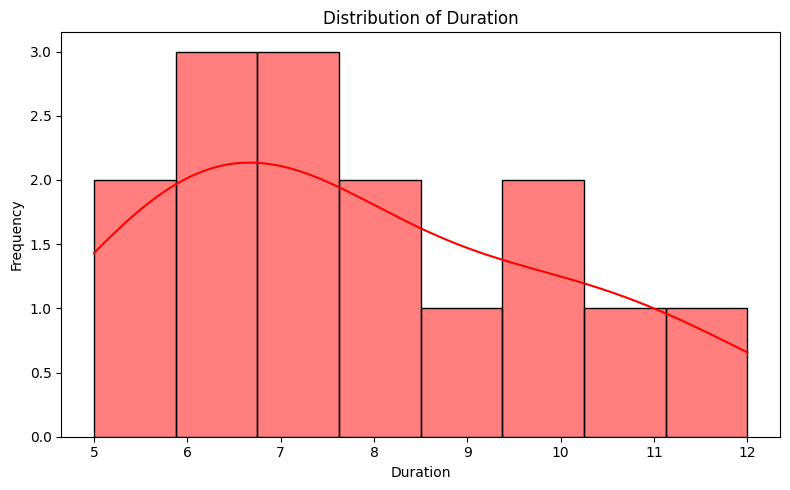

In [ ]:
#Ploting the distribution of Duration using a histogram.
data = {
    'Duration': [5, 7, 8, 6, 9, 10, 6, 5, 8, 7, 12, 11, 6, 7, 10]
}
df = pd.DataFrame(data)

# Plotting the histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Duration'], bins=8, kde=True, color='red', edgecolor='black')

plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-44-53742fa6e301>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),


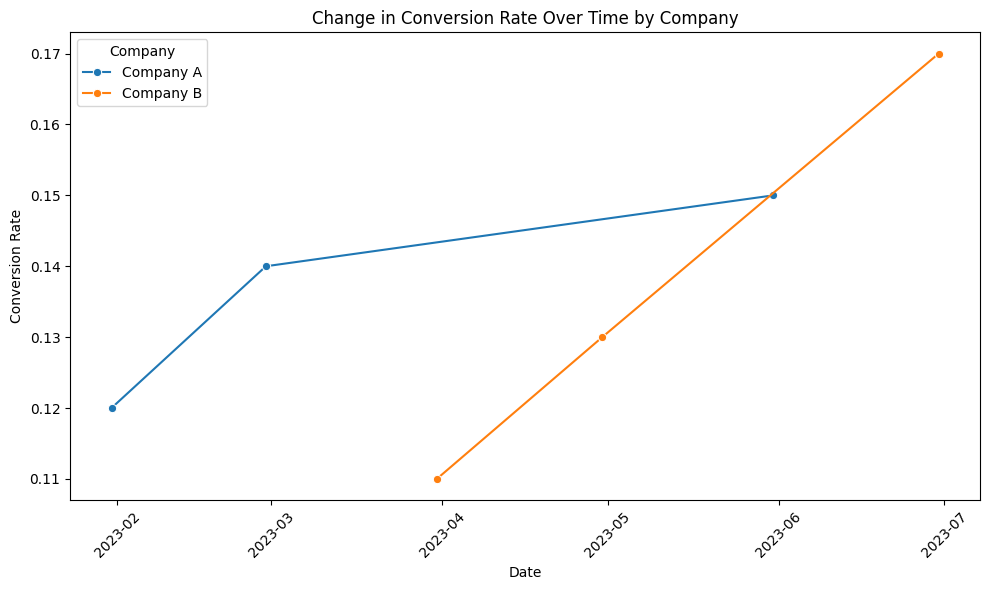

In [ ]:
#Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart.
data = {
    'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Company': ['Company A', 'Company A', 'Company B', 'Company B', 'Company A', 'Company B'],
    'Conversion_Rate': [0.12, 0.14, 0.11, 0.13, 0.15, 0.17]
}
df = pd.DataFrame(data)

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Conversion_Rate', hue='Company', marker='o')

plt.title('Change in Conversion Rate Over Time by Company')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-46-0d97c36d4335>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),


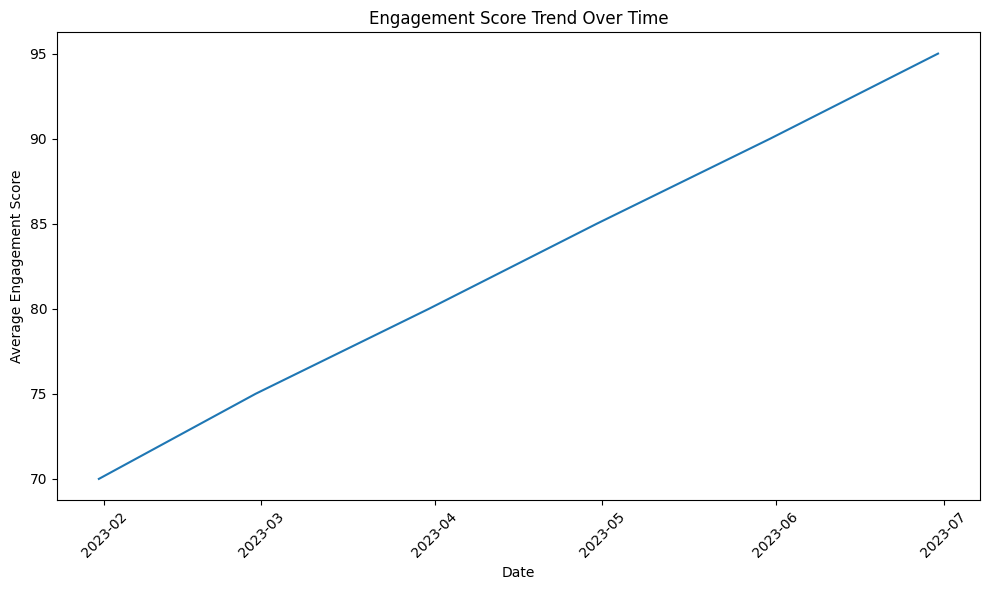

In [ ]:
#Examinethetrend of Engagement_Scoreover Date with a line chart.
data = {
    'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Engagement_Score': [70, 75, 80, 85, 90, 95]
}
df = pd.DataFrame(data)

# Grouping the data by Date and calculating the mean of Engagement_Score (if you have multiple records per date)
engagement_trend = df.groupby('Date')['Engagement_Score'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Engagement_Score', data=engagement_trend)

# Adding title and labels
plt.title('Engagement Score Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Engagement Score')

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

<ipython-input-48-bf2626c16efe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cost_by_location, x='Location', y='Acquisition_Cost', palette='Oranges')


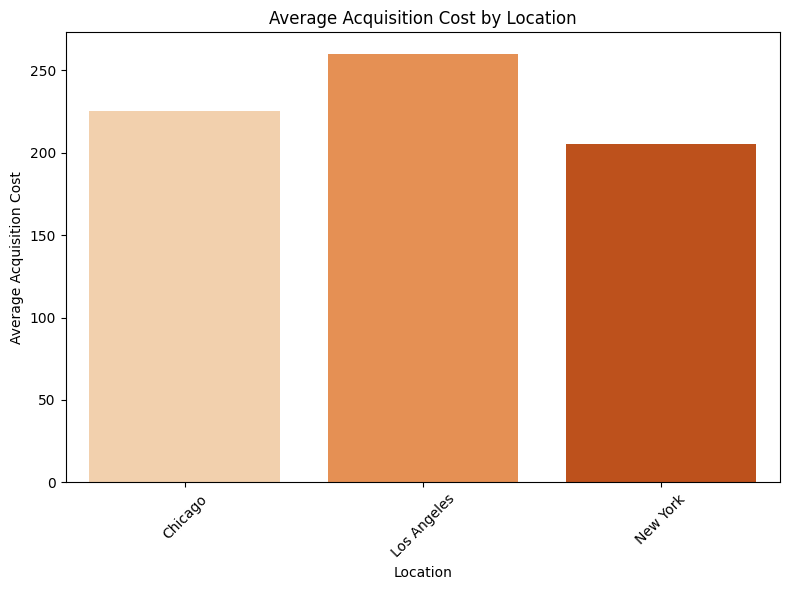

In [ ]:
#Determinewhich location has the highest Acquisition_Cost using a bar chart
data = {
    'Location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago'],
    'Acquisition_Cost': [200, 250, 220, 210, 270, 230]
}
df = pd.DataFrame(data)

# Calculate average or total Acquisition Cost by Location
# You can use .mean() or .sum() depending on what you want to show
cost_by_location = df.groupby('Location')['Acquisition_Cost'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=cost_by_location, x='Location', y='Acquisition_Cost', palette='Oranges')

plt.title('Average Acquisition Cost by Location')
plt.xlabel('Location')
plt.ylabel('Average Acquisition Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

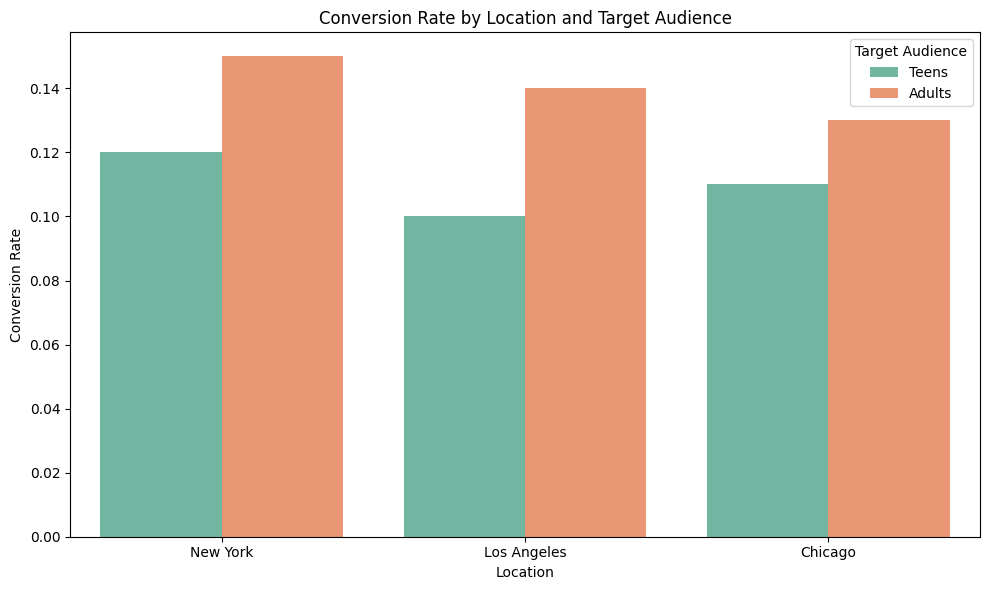

In [ ]:
#Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart.
data = {
    'Location': ['New York', 'New York', 'Los Angeles', 'Los Angeles', 'Chicago', 'Chicago'],
    'Target_Audience': ['Teens', 'Adults', 'Teens', 'Adults', 'Teens', 'Adults'],
    'Conversion_Rate': [0.12, 0.15, 0.10, 0.14, 0.11, 0.13]
}
df = pd.DataFrame(data)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Location', y='Conversion_Rate', hue='Target_Audience', palette='Set2')

plt.title('Conversion Rate by Location and Target Audience')
plt.xlabel('Location')
plt.ylabel('Conversion Rate')
plt.legend(title='Target Audience')
plt.tight_layout()
plt.show()

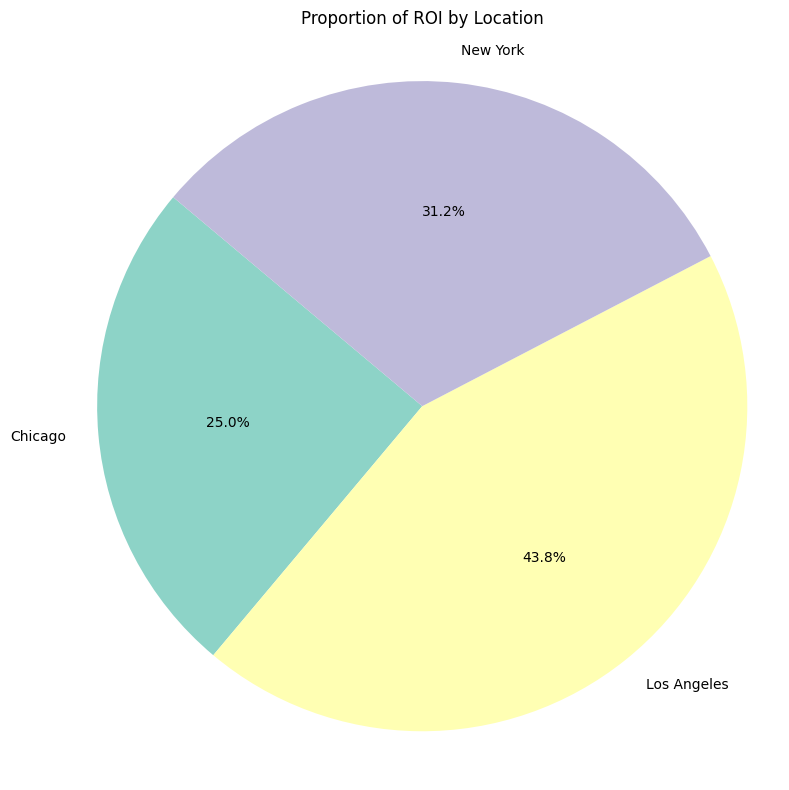

In [ ]:
##Illustrating the proportion of ROI by Location using a pie chart."""
data = {
    'Location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago'],
    'ROI': [1200, 1800, 900, 1300, 1700, 1100]
}
df = pd.DataFrame(data)

# Calculate total ROI by Location
roi_by_location = df.groupby('Location')['ROI'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    roi_by_location,
    labels=roi_by_location.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title('Proportion of ROI by Location')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()